In [1]:
import numpy as np
import mpmath as mp

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from lib.renormalization.ising import *
from lib.renormalization.utils import *
#from lib.matrix_manipulation import matrix_average

In [2]:
mp.mp.dps = 20
mp.mp.pretty = True

In [5]:
# Create model instance
J = 2
H = 0.1

n = 3
u = 'x'

p = 0.5
N = 500

ising = IsingRenormalizationGroup(J, H, n, u, p, N)

In [6]:
# Determine phase
k, phase = ising.phase()
print(f"Phase: {phase}")

(2, 'x_aligned')

# Phase diagram

In [9]:
# Color dictionary for consistency in phase colors
cdic = {"disorder":"grey",
        "ferro":"dodgerblue",
        "antiferro":"crimson",
        "x_antialigned":"lightcoral",
        
        "x_aligned":"powderblue",
        "xy_aligned":"lightgreen",
        "xyz_aligned":"darkgreen",
        "xory_aligned":"blue",
        "xoryorz_aligned":"darkblue",
        
        "xy_alternating":"yellow",
        
        "x_antiferro":"lightcoral",
        "xory_antiferro":"red",
        "xoryorz_antiferro":"darkred",

        "nematic":"cyan",
        
        "unknown":"black",
        "undetermined":"lightgrey"}

## Component number n = 1

In [7]:
%%time

u = 'x'

p = 0.5
N = 500

L = 60
T_values = np.linspace(start=0.01, stop=2, num=L)
HJ_values = np.linspace(start=0, stop=2, num=L)

disorder, ferro, antiferro, x_aligned, x_antialigned, unknown, undetermined = [],[],[],[],[],[],[]

for i, T in enumerate(T_values): # Temperature (1/J) values
    for HJ in HJ_values: # H/J values
        
        J = 1 / T
        H = HJ / T
        ising = IsingRenormalizationGroup(J, H, 1, u, p, N)
        k, phase = ising.phase()

        if phase == "disorder":
            disorder.append([HJ, T])

        elif phase == "ferro":
            ferro.append([HJ, T])

        elif phase == "antiferro":
            antiferro.append([HJ, T])

        elif phase == "x_aligned":
            x_aligned.append([HJ, T])

        elif phase == "x_antialigned":
            x_antialigned.append([HJ, T])

        elif phase == "unknown":
            unknown.append([HJ, T])
        
        else:
            undetermined.append([HJ, T])
            
        print("T = %.3f; H/J = %.3f; k = %d, phase = %s" % (T, HJ, k, phase), end='')
        print("\t\t\t", end='\r')

CPU times: user 1h 47min 22s, sys: 31.8 s, total: 1h 47min 54s
Wall time: 1h 48min 33s


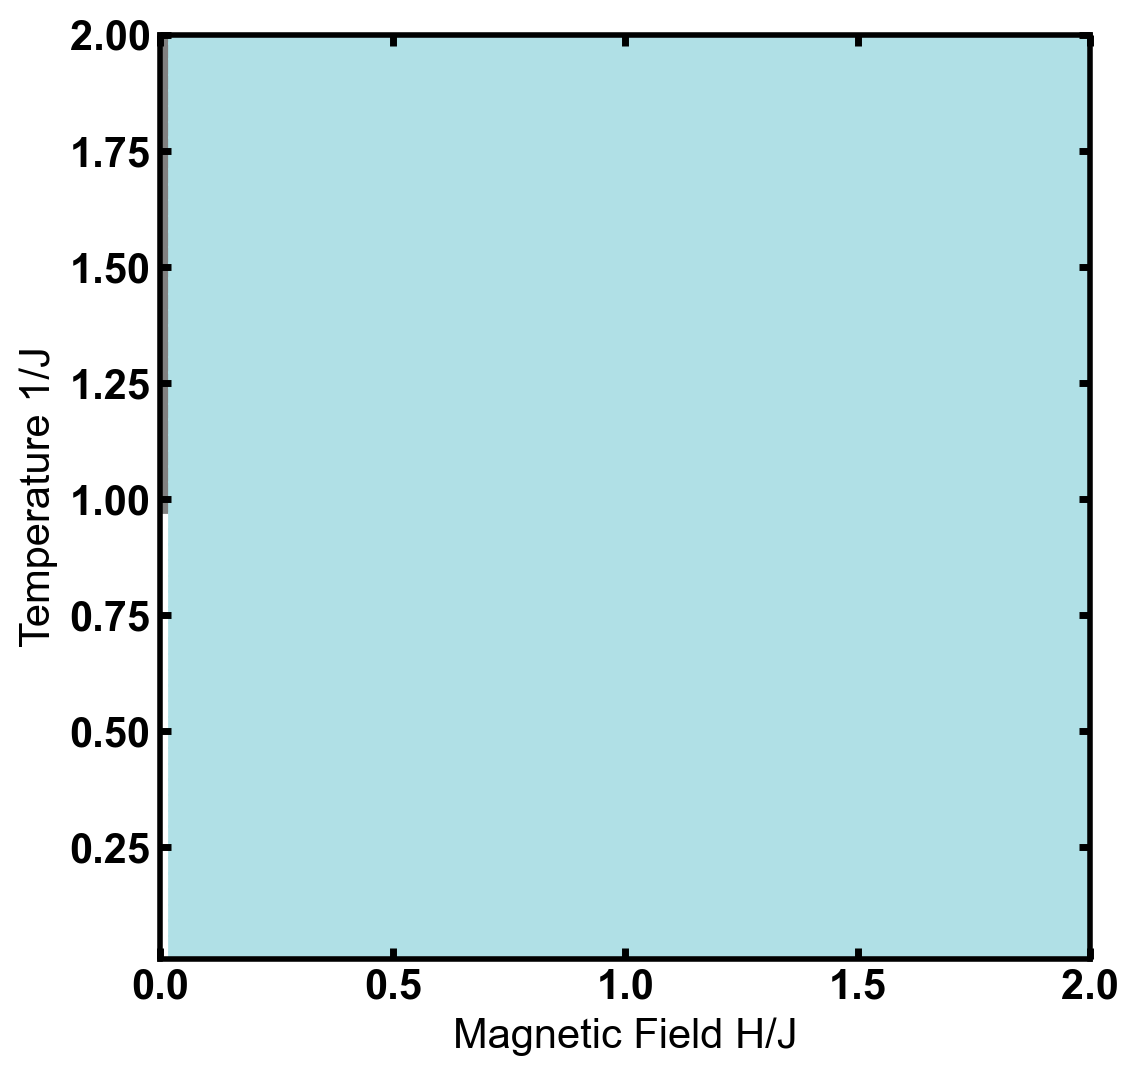

In [17]:
# Plot the results
fig, ax = plt.subplots(figsize=(6, 6))
lw, fs = 2, 12

kwargs = {"markersize":5.4, "linestyle":"", "marker":"s", "zorder":0, "alpha":1}
if disorder: ax.plot(np.array(disorder)[:,0], np.array(disorder)[:,1], mfc=cdic["disorder"], mec=cdic["disorder"], **kwargs)
if ferro: ax.plot(np.array(ferro)[:,0], np.array(ferro)[:,1], mfc=cdic["ferro"], mec=cdic["ferro"], **kwargs)
if antiferro: ax.plot(np.array(antiferro)[:,0], np.array(antiferro)[:,1], mfc=cdic["antiferro"], mec=cdic["antiferro"], **kwargs)
if x_aligned: ax.plot(np.array(x_aligned)[:,0], np.array(x_aligned)[:,1], mfc=cdic["x_aligned"], mec=cdic["x_aligned"], **kwargs)
if x_antialigned: ax.plot(np.array(x_antialigned)[:,0], np.array(x_antialigned)[:,1], mfc=cdic["x_antialigned"], mec=cdic["x_antialigned"], **kwargs)

ax.axis([HJ_values.min(), HJ_values.max(), T_values.min(), T_values.max()])
ax.set_xlabel("Magnetic Field H/J", fontsize=fs)
ax.set_ylabel("Temperature 1/J", fontsize=fs)
ax.tick_params(axis="both", direction="in", labelbottom=True, labeltop=False, labelleft=True, labelright=False, bottom=True, top=True, left=True, right=True, length=4, width=lw, labelsize=fs)
plt.show()

## Component number n = 2

In [ ]:
%%time

u = 'xy'

p = 0.5
N = 500

L = 60
T_values = np.linspace(start=0.01, stop=2, num=L)
HJ_values = np.linspace(start=0, stop=2, num=L)

disorder, ferro, x_aligned, xy_aligned, xory_aligned, xy_alternating, x_antiferro, xory_antiferro, unknown, undetermined = [],[],[],[],[],[],[],[],[],[]

for i, T in enumerate(T_values): # Temperature (1/J) values
    for HJ in HJ_values: # H/J values
        
        J = 1 / T
        H = HJ / T
        ising = IsingRenormalizationGroup(J, H, 2, u, p, N)
        k, phase = ising.phase()

        if phase == "disorder":
            disorder.append([HJ, T])

        elif phase == "ferro":
            ferro.append([HJ, T])           

        elif phase == "x_aligned":
            x_aligned.append([HJ, T])

        elif phase == "xy_aligned":
            xy_aligned.append([HJ, T])

        elif phase == "xory_aligned":
            xory_aligned.append([HJ, T])

        elif phase == "xy_alternating":
            xy_alternating.append([HJ, T])

        elif phase == "x_antiferro":
            x_antiferro.append([HJ, T])

        elif phase == "xory_antiferro":
            xory_antiferro.append([HJ, T])

        elif phase == "unknown":
            unknown.append([HJ, T])
        
        else:
            undetermined.append([HJ, T])
            
        print("T = %.3f; H/J = %.3f; k = %d, phase = %s" % (T, HJ, k, phase), end='')
        print("\t\t\t", end='\r')

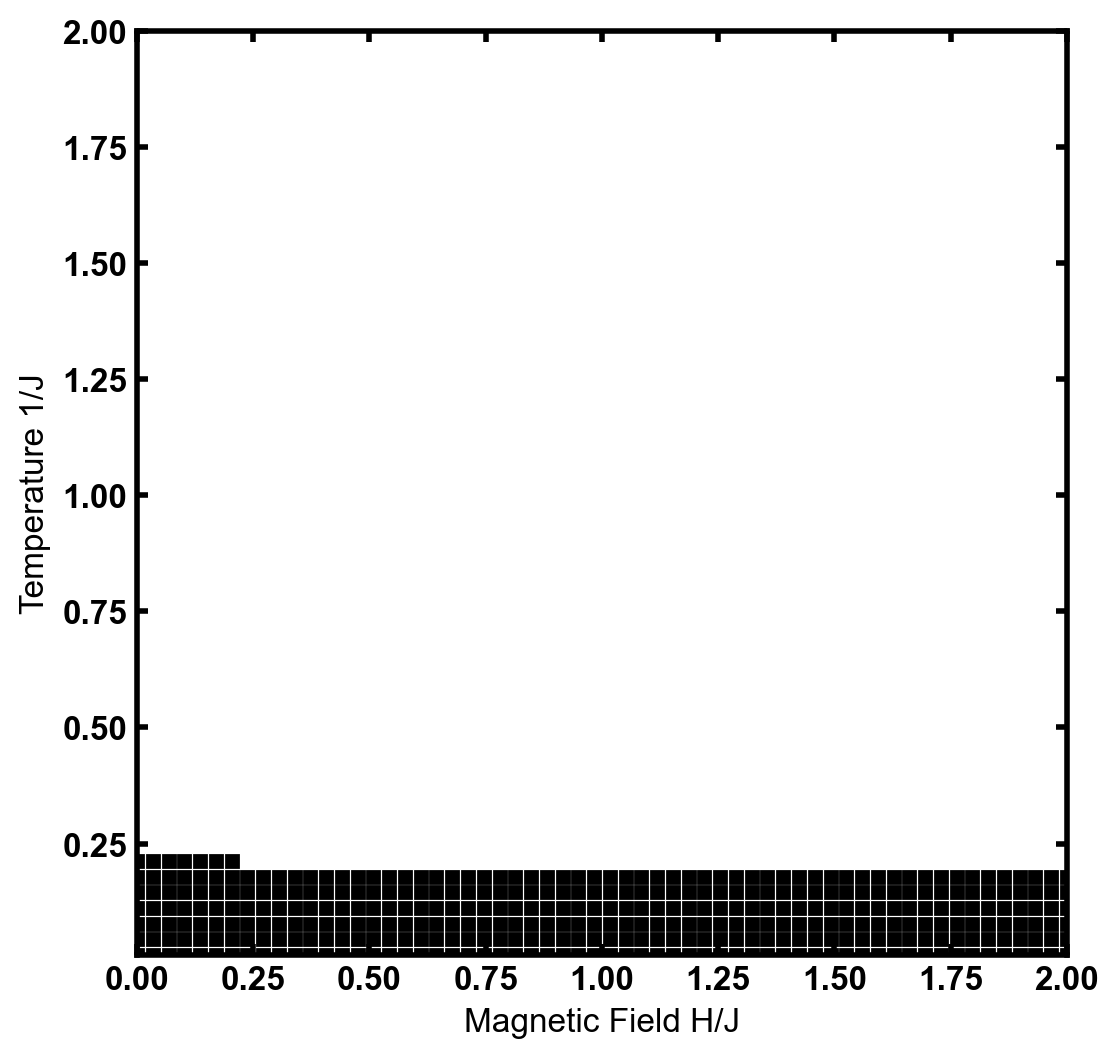

In [25]:
# Plot the results
fig, ax = plt.subplots(figsize=(6, 6))
lw, fs = 2, 12

ms = 4
if disorder: ax.plot(np.array(disorder)[:,0], np.array(disorder)[:,1], ls="", marker="s", mfc=cdic["disorder"], mec=cdic["disorder"], ms=ms, alpha=1)
if ferro: ax.plot(np.array(ferro)[:,0], np.array(ferro)[:,1], ls="", marker="s", mfc=cdic["ferro"], mec=cdic["ferro"], ms=ms, alpha=1)
if x_aligned: ax.plot(np.array(x_aligned)[:,0], np.array(x_aligned)[:,1], ls="", marker="s", mfc=cdic["x_aligned"], mec=cdic["x_aligned"], ms=ms, alpha=1)
if xy_aligned: ax.plot(np.array(xy_aligned)[:,0], np.array(xy_aligned)[:,1], ls="", marker="s", mfc=cdic["xy_aligned"], mec=cdic["xy_aligned"], ms=ms, alpha=1)
if xory_aligned: ax.plot(np.array(xory_aligned)[:,0], np.array(xory_aligned)[:,1], ls="", marker="s", mfc=cdic["xory_aligned"], mec=cdic["xory_aligned"], ms=ms, alpha=1)
if xy_alternating: ax.plot(np.array(xy_alternating)[:,0], np.array(xy_alternating)[:,1], ls="", marker="s", mfc=cdic["xy_alternating"], mec=cdic["xy_alternating"], ms=ms, alpha=1)
if x_antiferro: ax.plot(np.array(x_antiferro)[:,0], np.array(x_antiferro)[:,1], ls="", marker="s", mfc=cdic["x_antiferro"], mec=cdic["x_antiferro"], ms=ms, alpha=1)
if xory_antiferro: ax.plot(np.array(xory_antiferro)[:,0], np.array(xory_antiferro)[:,1], ls="", marker="s", mfc=cdic["xory_antiferro"], mec=cdic["xory_antiferro"], ms=ms, alpha=1)
if unknown: ax.plot(np.array(unknown)[:,0], np.array(unknown)[:,1], ls="", marker="s", mfc=cdic["unknown"], mec=cdic["unknown"], ms=ms, alpha=1)
if undetermined: ax.plot(np.array(undetermined)[:,0], np.array(undetermined)[:,1], ls="", marker="s", mfc=cdic["undetermined"], mec=cdic["undetermined"], ms=ms, alpha=1)
ax.axis([HJ_values.min(), HJ_values.max(), T_values.min(), T_values.max()])
ax.set_xlabel("Magnetic Field H/J", fontsize=fs)
ax.set_ylabel("Temperature 1/J", fontsize=fs)
ax.tick_params(axis="both", direction="in", labelbottom=True, labeltop=False, labelleft=True, labelright=False, bottom=True, top=True, left=True, right=True, length=4, width=lw, labelsize=fs)
plt.show()

## Component number n = 3

In [ ]:
%%time

u = 'xyz'

p = 0.5
N = 500

L = 60
T_values = np.linspace(start=0.01, stop=2, num=L)
HJ_values = np.linspace(start=0, stop=2, num=L)

disorder, ferro, x_aligned, xy_aligned, xyz_aligned, xory_aligned, xoryorz_aligned, xy_alternating, x_antiferro, xory_antiferro, xoryorz_antiferro, nematic, unknown, undetermined = [],[],[],[],[],[],[],[],[],[],[],[],[],[]

for i, T in enumerate(T_values): # Temperature (1/J) values
    for HJ in HJ_values: # H/J values
        
        J = 1 / T
        H = HJ / T
        ising = IsingRenormalizationGroup(J, H, 3, u, p, N)
        k, phase = ising.phase()

        if phase == "disorder":
            disorder.append([HJ, T])

        elif phase == "ferro":
            ferro.append([HJ, T])

        elif phase == "x_aligned":
            x_aligned.append([HJ, T])

        elif phase == "xy_aligned":
            xy_aligned.append([HJ, T])

        elif phase == "xyz_aligned":
            xyz_aligned.append([HJ, T])

        elif phase == "xory_aligned":
            xory_aligned.append([HJ, T])

        elif phase == "xoryorz_aligned":
            xoryorz_aligned.append([HJ, T])

        elif phase == "xy_alternating":
            xy_alternating.append([HJ, T])

        elif phase == "x_antiferro":
            x_antiferro.append([HJ, T])

        elif phase == "xory_antiferro":
            xory_antiferro.append([HJ, T])

        elif phase == "xoryorz_antiferro":
            xoryorz_antiferro.append([HJ, T])

        elif phase == "nematic":
            nematic.append([HJ, T])

        elif phase == "unknown":
            unknown.append([HJ, T])
        
        else:
            undetermined.append([HJ, T])
            
        print("T = %.3f; H/J = %.3f; k = %d, phase = %s" % (T, HJ, k, phase), end='')
        print("\t\t\t", end='\r')

In [ ]:
# Plot the results
fig, ax = plt.subplots(figsize=(6, 6))
lw, fs = 2, 12

kwargs = {"markersize":5.4, "linestyle":"", "marker":"s", "zorder":0, "alpha":1}
if disorder: ax.plot(np.array(disorder)[:,0], np.array(disorder)[:,1], mfc=cdic["disorder"], mec=cdic["disorder"], **kwargs)
if ferro: ax.plot(np.array(ferro)[:,0], np.array(ferro)[:,1], mfc=cdic["ferro"], mec=cdic["ferro"], **kwargs)
if x_aligned: ax.plot(np.array(x_aligned)[:,0], np.array(x_aligned)[:,1], mfc=cdic["x_aligned"], mec=cdic["x_aligned"], **kwargs)
if xy_aligned: ax.plot(np.array(xy_aligned)[:,0], np.array(xy_aligned)[:,1], mfc=cdic["xy_aligned"], mec=cdic["xy_aligned"], **kwargs)
if xyz_aligned: ax.plot(np.array(xyz_aligned)[:,0], np.array(xyz_aligned)[:,1], mfc=cdic["xyz_aligned"], mec=cdic["xyz_aligned"], **kwargs)
if xory_aligned: ax.plot(np.array(xory_aligned)[:,0], np.array(xory_aligned)[:,1], mfc=cdic["xory_aligned"], mec=cdic["xory_aligned"], **kwargs)
if xoryorz_aligned: ax.plot(np.array(xoryorz_aligned)[:,0], np.array(xoryorz_aligned)[:,1], mfc=cdic["xoryorz_aligned"], mec=cdic["xoryorz_aligned"], **kwargs)
if xy_alternating: ax.plot(np.array(xy_alternating)[:,0], np.array(xy_alternating)[:,1], mfc=cdic["xy_alternating"], mec=cdic["xy_alternating"], **kwargs)
if x_antiferro: ax.plot(np.array(x_antiferro)[:,0], np.array(x_antiferro)[:,1], mfc=cdic["x_antiferro"], mec=cdic["x_antiferro"], **kwargs)
if xory_antiferro: ax.plot(np.array(xory_antiferro)[:,0], np.array(xory_antiferro)[:,1], mfc=cdic["xory_antiferro"], mec=cdic["xory_antiferro"], **kwargs)
if xoryorz_antiferro: ax.plot(np.array(xoryorz_antiferro)[:,0], np.array(xoryorz_antiferro)[:,1], mfc=cdic["xoryorz_antiferro"], mec=cdic["xoryorz_antiferro"], **kwargs)
if nematic: ax.plot(np.array(nematic)[:,0], np.array(nematic)[:,1], mfc=cdic["nematic"], mec=cdic["nematic"], **kwargs)
if unknown: ax.plot(np.array(unknown)[:,0], np.array(unknown)[:,1], mfc=cdic["unknown"], mec=cdic["unknown"], **kwargs)
if undetermined: ax.plot(np.array(undetermined)[:,0], np.array(undetermined)[:,1], mfc=cdic["undetermined"], mec=cdic["undetermined"], **kwargs)
ax.axis([HJ_values.min(), HJ_values.max(), T_values.min(), T_values.max()])
ax.set_xlabel("Magnetic Field H/J", fontsize=fs)
ax.set_ylabel("Temperature 1/J", fontsize=fs)
ax.tick_params(axis="both", direction="in", labelbottom=True, labeltop=False, labelleft=True, labelright=False, bottom=True, top=True, left=True, right=True, length=4, width=lw, labelsize=fs)
plt.show()